# The Susceptible-Infected-Recovered model
A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

-S(t) are those susceptible but not yet infected with the disease;

-I(t) is the number of infectious individuals;

-R(t) are those individuals who have recovered from the disease and now have immunity to it.


The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$$ \frac{dS}{dt} =  - \frac{ \beta}{N} SI
$$
$$ \frac{dI}{dt} =   \frac{\beta}{N} SI - \gamma I
$$
$$ \frac{dR}{dt} =  \gamma I
$$

Can you find the equilibrium points ?

Can you discuss their stability ?

# A simple Python implementation

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

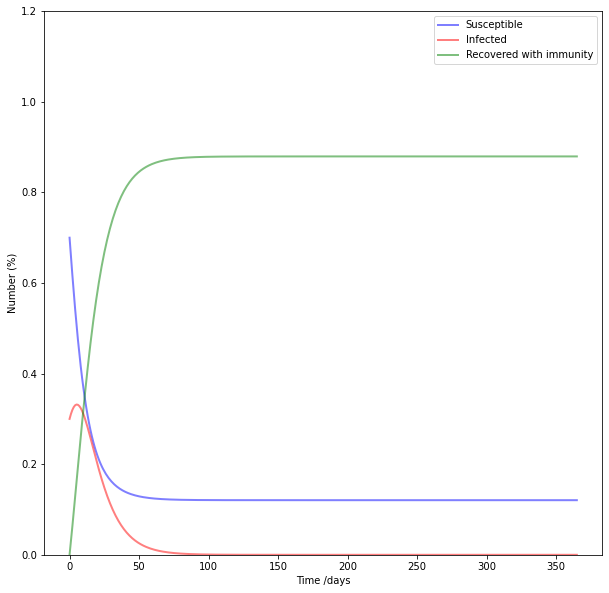

In [21]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 300, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
β, γ = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 365, 365)

# The SIR model differential equations.
def sir(y, t, N, β, γ):
    S, I, R = y
    dSdt = -β * S * I / N
    dIdt = β * S * I / N - γ * I
    dRdt = γ * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(sir, y0, t, args=(N, β, γ))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (%)')
ax.set_ylim(0,1.2)
legend = ax.legend()


In [23]:
N = 1000
β, γ = 0.2, 1./10 
from ipywidgets import interact 
@interact
def interact_sir(I0:(0, N, 1)=20, R0:(0, N, 1)=0):
    #I0 = II
    #R0 = RR
    S0 = N - I0 - R0
    t = np.linspace(0, 365, 365)
    y0 = S0, I0, R0
    ret = odeint(sir, y0, t, args=(N, β, γ))
    S, I, R = ret.T

    fig, ax = plt.subplots(1, 1,figsize=(10, 10))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (%)')
    ax.set_ylim(0,1.2)
    legend = ax.legend()
    

interactive(children=(IntSlider(value=20, description='I0', max=1000), IntSlider(value=0, description='R0', ma…